In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sn
from scipy import stats
import joblib 

plt.rcParams['figure.figsize'] = 12, 6

In [45]:
df = pd.read_csv("D:\Machine Learing\DataSets\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploring the Dataset

In [46]:
df.shape

(284807, 31)

In [47]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
df.isna().values.any()

False

In [50]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [51]:
Fraud = df[df['Class']==1]
Non_fraud = df[df['Class']==0]
print(f'Number of frauds are: {df.Class.value_counts()[0]}')
print(f'Number of non fraud are: {df.Class.value_counts()[1]}')

Number of frauds are: 284315
Number of non fraud are: 492


Text(0, 0.5, 'Frequency')

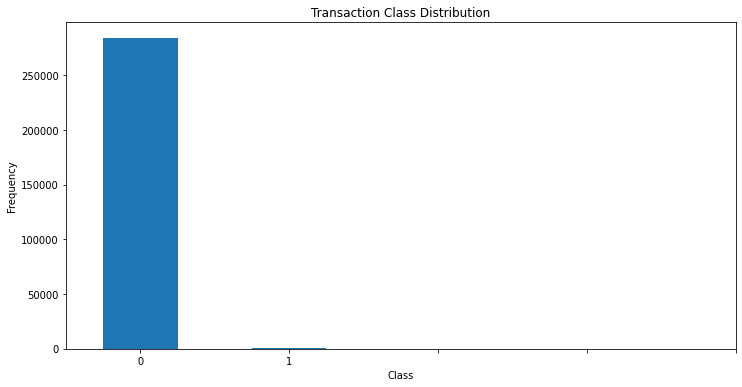

In [52]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=2)

plt.title("Transaction Class Distribution")

plt.xticks(range(5),)

plt.xlabel("Class")

plt.ylabel("Frequency")

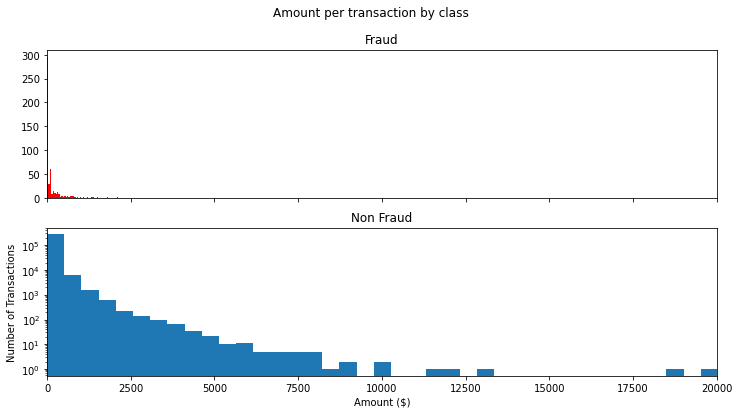

In [53]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins, color='red')
ax1.set_title('Fraud')
ax2.hist(Non_fraud.Amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

## Minimum amount of transaction was made was `0.0$` which look some kind of error or it can test need to investigate

In [54]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [55]:
Non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Finding realtion between _Amount_ and _Class_
https://www.investopedia.com/terms/c/correlationcoefficient.asp - Details about correlation
<br>1 to -1 + means positive - means negative perfect value is 1

In [56]:
df['Amount'].corr(df['Class'])

0.005631753006768527

## Finding Outlier In Amount column

<AxesSubplot:xlabel='Amount'>

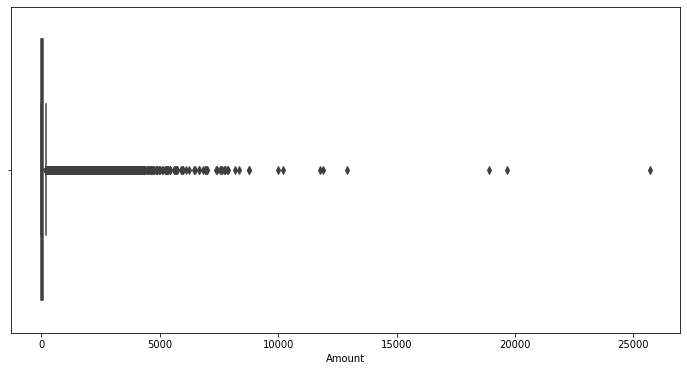

In [57]:
sn.boxplot(x=df['Amount'])

## Time looks good

<AxesSubplot:xlabel='Time'>

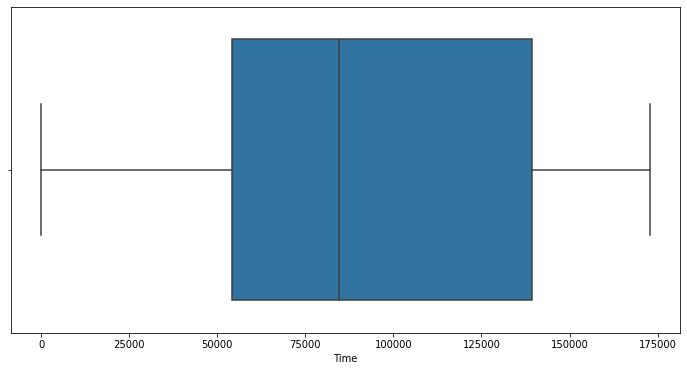

In [58]:
sn.boxplot(x=df['Time'])

In [59]:
df2 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

<AxesSubplot:xlabel='Amount'>

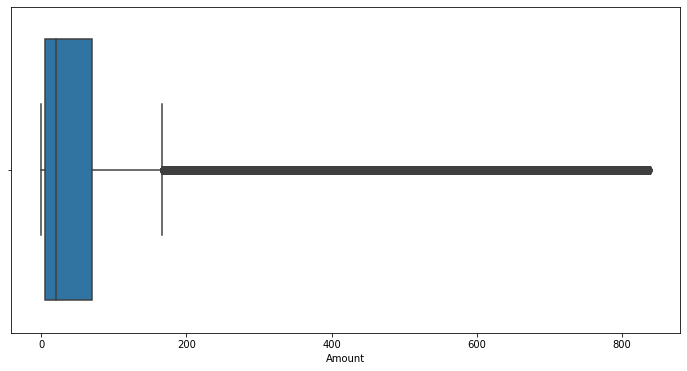

In [60]:
sn.boxplot(x=df2['Amount'])

<AxesSubplot:>

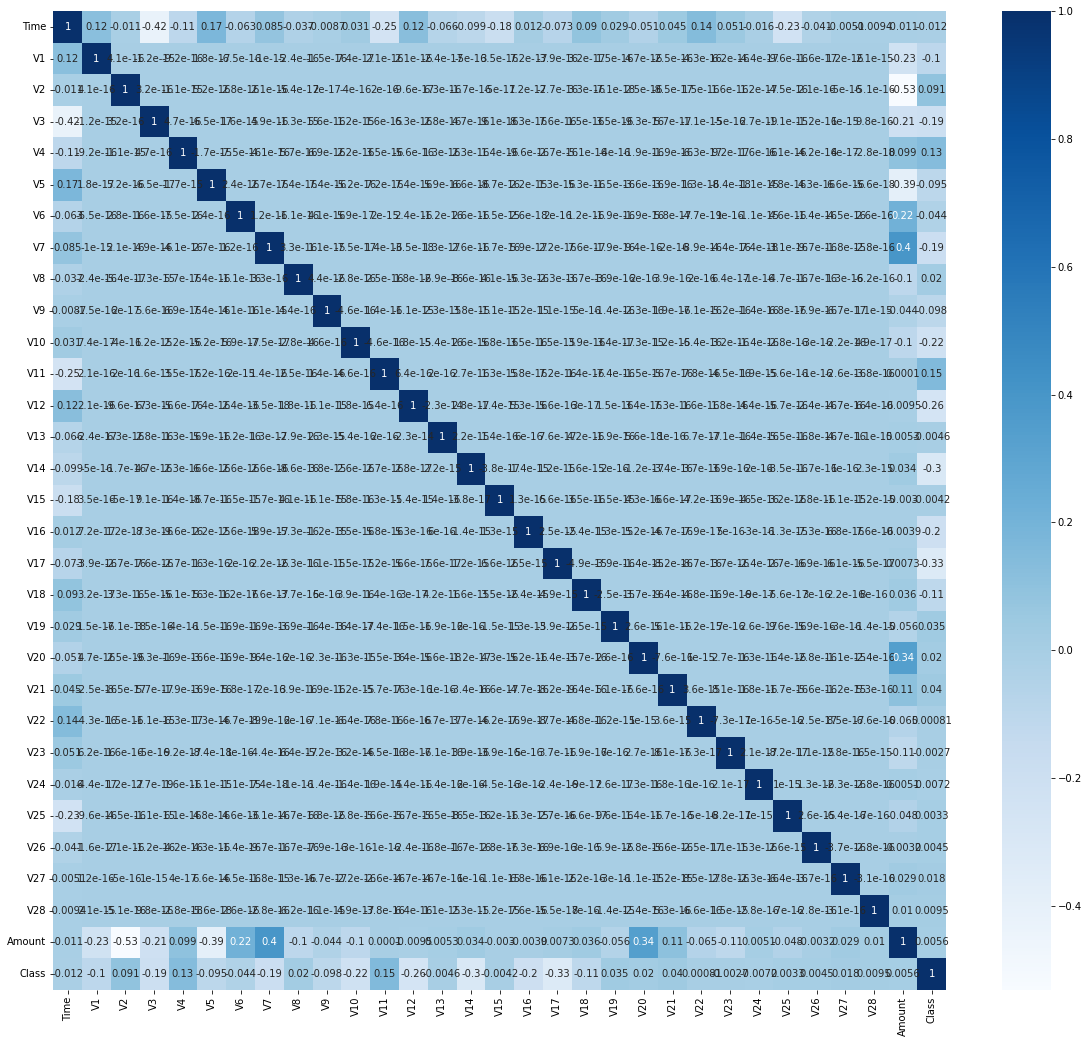

In [18]:
plt.figure(figsize=(20,18))
sn.heatmap(df.corr(),annot=True, cmap="Blues")

In [19]:
df1 = df.copy()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Working with imbalanced data
## `https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/` How Imbalance is misleading

## Using robustscaler on the unscaled columns

In [21]:
rob_scaler = RobustScaler()
df1['Amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1, 1))
df1['Time'] = rob_scaler.fit_transform(df1['Time'].values.reshape(-1, 1))

In [22]:
X=df1.drop('Class', axis=1)
y=df1['Class']
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

## Fuction to train models 

In [23]:
def predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions = pd.DataFrame(pred)
    print(f'Model Predicted Result: \n{predictions[0].value_counts()}')
    print(f'Confusion Matrix\n {confusion_matrix(y_test, pred)}')
    print(f'Classification Report\n {classification_report(y_test,pred)}')
    print(f'Accuracy Score: {accuracy_score(y_test,pred)}')

# LogisticRegression

In [24]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    56874
1       88
Name: 0, dtype: int64
Confusion Matrix
 [[56838    13]
 [   36    75]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.85      0.68      0.75       111

    accuracy                           1.00     56962
   macro avg       0.93      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9991397773954567


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DecisionTreeClassifier

In [25]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    56844
1      118
Name: 0, dtype: int64
Confusion Matrix
 [[56816    35]
 [   28    83]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.70      0.75      0.72       111

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9988939995084443


# RandomForestClassifier

In [26]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    56873
1       89
Name: 0, dtype: int64
Confusion Matrix
 [[56849     2]
 [   24    87]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.98      0.78      0.87       111

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9995435553526912


# Support Vector Machine

In [27]:
predict(SVC(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    56880
1       82
Name: 0, dtype: int64
Confusion Matrix
 [[56847     4]
 [   33    78]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.95      0.70      0.81       111

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9993504441557529


# GaussianNB

In [28]:
predict(GaussianNB(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    55592
1     1370
Name: 0, dtype: int64
Confusion Matrix
 [[55575  1276]
 [   17    94]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56851
           1       0.07      0.85      0.13       111

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy Score: 0.9773006565780696


# MLPClassifier

In [29]:
predict(MLPClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    56859
1      103
Name: 0, dtype: int64
Confusion Matrix
 [[56840    11]
 [   19    92]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.89      0.83      0.86       111

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9994733330992591


### <font color='cram'> while working in an imbalanced domain accuracy is not an appropriate measure to evaluate model performance. For eg: A classifier which achieves an accuracy of 98 % with an event rate of 2 % is not accurate, if it classifies all instances as the majority class. And eliminates the 2 % minority class observations as noise 'https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/' </font>

# Balanceing Data using _**[F]**_
### <b>_https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/_</b> Balancing technique of data 

### https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18 How to apply Balanceing technique(Lots of info there look if u need anything or incase u forgot)

# Resampling Techniques

## Over Sampling

In [30]:
from sklearn.utils import resample
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 27)

In [31]:
Un_X = pd.concat([X_train, y_train], axis=1)
not_fraud = Un_X[Un_X.Class == 0]
fraud = Un_X[Un_X.Class == 1]

In [32]:
df_overSample = resample(fraud,n_samples=len(not_fraud), replace=True, random_state=27)

In [33]:
upsampled = pd.concat([not_fraud, df_overSample])

In [34]:
upsampled.Class.value_counts()

0    227457
1    227457
Name: Class, dtype: int64

In [35]:
df.shape, upsampled.shape

((284807, 31), (454914, 31))

In [61]:
data1= upsampled.sample(frac = 0.5,random_state=1)

In [62]:
data1.shape

(227457, 31)

Text(0, 0.5, 'Frequency')

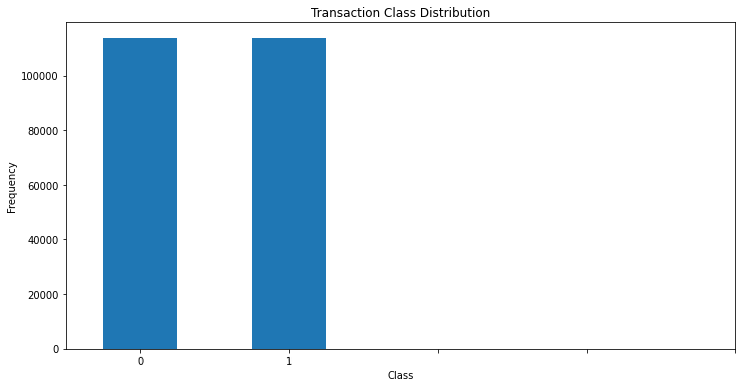

In [38]:
count_classes = data1.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=2)

plt.title("Transaction Class Distribution")
plt.xticks(range(5),)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [63]:
X_O = data1.drop('Class', axis=1)
y_O = data1.Class
#X_train, y_train, X_train, y_test = train_test_split(X_trainO, y_trainO, train_size=.6)
X_train,X_test, y_train, y_test= train_test_split(X_O,y_O, test_size=0.2, random_state= 27)

In [64]:
X_train.shape

(181965, 30)

In [65]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB(), MLPClassifier()]
len(models)

6

## LogisticRegression

In [66]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    24089
1    21403
Name: 0, dtype: int64
Confusion Matrix
 [[22412   506]
 [ 1677 20897]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     22918
           1       0.98      0.93      0.95     22574

    accuracy                           0.95     45492
   macro avg       0.95      0.95      0.95     45492
weighted avg       0.95      0.95      0.95     45492

Accuracy Score: 0.9520135408423459


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#

In [43]:
upsampled.Class.value_counts()

0    227457
1    227457
Name: Class, dtype: int64

## DecisionTreeClassifier

In [67]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    22898
1    22594
Name: 0, dtype: int64
Confusion Matrix
 [[22898    20]
 [    0 22574]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22918
           1       1.00      1.00      1.00     22574

    accuracy                           1.00     45492
   macro avg       1.00      1.00      1.00     45492
weighted avg       1.00      1.00      1.00     45492

Accuracy Score: 0.9995603622614966


## RandomForestClassifier

In [68]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    22917
1    22575
Name: 0, dtype: int64
Confusion Matrix
 [[22917     1]
 [    0 22574]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22918
           1       1.00      1.00      1.00     22574

    accuracy                           1.00     45492
   macro avg       1.00      1.00      1.00     45492
weighted avg       1.00      1.00      1.00     45492

Accuracy Score: 0.9999780181130749


## SVC

In [71]:
predict(SVC(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    23826
1    21666
Name: 0, dtype: int64
Confusion Matrix
 [[22736   182]
 [ 1090 21484]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     22918
           1       0.99      0.95      0.97     22574

    accuracy                           0.97     45492
   macro avg       0.97      0.97      0.97     45492
weighted avg       0.97      0.97      0.97     45492

Accuracy Score: 0.9720390398311791


## GaussianNB

In [69]:
predict(GaussianNB(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    25478
1    20014
Name: 0, dtype: int64
Confusion Matrix
 [[22356   562]
 [ 3122 19452]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     22918
           1       0.97      0.86      0.91     22574

    accuracy                           0.92     45492
   macro avg       0.92      0.92      0.92     45492
weighted avg       0.92      0.92      0.92     45492

Accuracy Score: 0.9190187285676602


## MLPClassifier

In [70]:
predict(MLPClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    22900
1    22592
Name: 0, dtype: int64
Confusion Matrix
 [[22900    18]
 [    0 22574]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22918
           1       1.00      1.00      1.00     22574

    accuracy                           1.00     45492
   macro avg       1.00      1.00      1.00     45492
weighted avg       1.00      1.00      1.00     45492

Accuracy Score: 0.9996043260353469


## Random Under-Sampling <br>`Random Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.`

## Near-miss algorithm

In [76]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [80]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 345
Before Undersampling, counts of label '0': 199019 

After Undersampling, the shape of train_X: (690, 30)
After Undersampling, the shape of train_y: (690,) 

After Undersampling, counts of label '1': 345
After Undersampling, counts of label '0': 345


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_train_miss, y_train_miss, test_size = 0.2, random_state = 0)

In [85]:
X_train.shape

(552, 30)

In [87]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    75
1    63
Name: 0, dtype: int64
Confusion Matrix
 [[70  1]
 [ 5 62]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.98      0.93      0.95        67

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138

Accuracy Score: 0.9565217391304348


In [88]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    76
1    62
Name: 0, dtype: int64
Confusion Matrix
 [[70  1]
 [ 6 61]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.98      0.91      0.95        67

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138

Accuracy Score: 0.9492753623188406


In [89]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    74
1    64
Name: 0, dtype: int64
Confusion Matrix
 [[71  0]
 [ 3 64]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.96      0.98        67

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138

Accuracy Score: 0.9782608695652174


In [90]:
predict(SVC(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    79
1    59
Name: 0, dtype: int64
Confusion Matrix
 [[71  0]
 [ 8 59]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       1.00      0.88      0.94        67

    accuracy                           0.94       138
   macro avg       0.95      0.94      0.94       138
weighted avg       0.95      0.94      0.94       138

Accuracy Score: 0.9420289855072463


In [93]:
predict(GaussianNB(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    75
1    63
Name: 0, dtype: int64
Confusion Matrix
 [[71  0]
 [ 4 63]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.94      0.97        67

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

Accuracy Score: 0.9710144927536232


In [95]:
predict(MLPClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    75
1    63
Name: 0, dtype: int64
Confusion Matrix
 [[71  0]
 [ 4 63]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.94      0.97        67

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

Accuracy Score: 0.9710144927536232


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Synthetic Minority Oversampling Technique

In [97]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=10)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [99]:
X.shape

(284807, 30)

In [102]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [104]:
X_train_res.shape

(398038, 30)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3, random_state = 0)

In [106]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Predicted Result: 
0    60189
1    59223
Name: 0, dtype: int64
Confusion Matrix
 [[59409   642]
 [  780 58581]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     60051
           1       0.99      0.99      0.99     59361

    accuracy                           0.99    119412
   macro avg       0.99      0.99      0.99    119412
weighted avg       0.99      0.99      0.99    119412

Accuracy Score: 0.9880916490804944


In [107]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    60031
1    59381
Name: 0, dtype: int64
Confusion Matrix
 [[60013    38]
 [   18 59343]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60051
           1       1.00      1.00      1.00     59361

    accuracy                           1.00    119412
   macro avg       1.00      1.00      1.00    119412
weighted avg       1.00      1.00      1.00    119412

Accuracy Score: 0.9995310354068268


In [108]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    60048
1    59364
Name: 0, dtype: int64
Confusion Matrix
 [[60039    12]
 [    9 59352]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60051
           1       1.00      1.00      1.00     59361

    accuracy                           1.00    119412
   macro avg       1.00      1.00      1.00    119412
weighted avg       1.00      1.00      1.00    119412

Accuracy Score: 0.99982413827756
